In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import keras
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")
tf.test.is_gpu_available()

True

In [5]:
# Read cleaned training data
data = pd.read_csv("drive/My Drive/Colab Notebooks/cleaned_train_data.csv")

# It is better to choose random_state=42
# Split training data into 70% training data and 20% validation data, 10% test data
train, testValidation = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)
test, validation = train_test_split(testValidation, test_size=0.66, random_state=42, shuffle=True)
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

X_train = train.comment_text
X_validation = validation.comment_text
Y_train = train[categories]
Y_validation = validation[categories]

train.shape:  (111699, 8)
test.shape:  (16276, 8)


In [6]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
54568,91da4b4b95fe5e2d,conflict of interest note by your user name it...,0,0,0,0,0,0
3786,0a1df25805d6d2e7,update actually i changed this to something bl...,0,0,0,0,0,0
22938,3c9e75d2b8dcf720,mica article sniper thanks for your comments o...,0,0,0,0,0,0
137856,e1b03f4baf9d58ce,arguing that bart and cal train should get mor...,0,0,0,0,0,0
143038,fcdf5d299437f2a9,blocked i i blocked you for hours for being un...,0,0,0,0,0,0


In [7]:
validation.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
78198,d1502b14889b8405,the page is only about mind old expansion and ...,0,0,0,0,0,0
155782,c39dc4fd8a8feeea,okay that fair lets proceed at a without the i...,0,0,0,0,0,0
58845,9d99254e1f6d5078,rent a car hyderabad hours service cont us for...,0,0,0,0,0,0
51383,8976356d2888b47e,us sure two admins to convince is what have al...,0,0,0,0,0,0
149052,5662d02dba405e28,leave my damn user page talk page alone stop m...,1,0,0,0,0,0


In [8]:
tfidfVec = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidfVec.fit_transform(X_train)
X_validation_tfidf = tfidfVec.transform(X_validation)
print(X_train_tfidf.shape)
print(X_validation_tfidf.shape)

(111699, 54351)
(31596, 54351)


In [9]:
model = keras.Sequential()
model.add(keras.layers.Dense(96, activation=tf.nn.relu, input_dim = X_train_tfidf.shape[1]))
model.add(keras.layers.Dense(6, activation=tf.nn.sigmoid))

model.summary()

W0811 00:47:02.739282 139977007998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 00:47:02.743258 139977007998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 00:47:02.757026 139977007998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 96)                5217792   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 582       
Total params: 5,218,374
Trainable params: 5,218,374
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

W0811 00:47:08.145349 139977007998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 00:47:08.168364 139977007998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0811 00:47:08.174206 139977007998848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [13]:
history = model.fit(X_train_tfidf, Y_train, epochs=20, batch_size=512, validation_data=(X_validation_tfidf, Y_validation), verbose=1, callbacks=[earlyStopping])

W0811 00:48:06.344305 139977007998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 111699 samples, validate on 31596 samples
Epoch 1/20
111699/111699 [==============================] - 45s 402us/step - loss: 0.2477 - acc: 0.9624 - val_loss: 0.0910 - val_acc: 0.9729
Epoch 2/20
111699/111699 [==============================] - 42s 377us/step - loss: 0.0706 - acc: 0.9779 - val_loss: 0.0649 - val_acc: 0.9790
Epoch 3/20
111699/111699 [==============================] - 42s 377us/step - loss: 0.0529 - acc: 0.9819 - val_loss: 0.0583 - val_acc: 0.9804
Epoch 4/20
111699/111699 [==============================] - 42s 373us/step - loss: 0.0440 - acc: 0.9842 - val_loss: 0.0556 - val_acc: 0.9810
Epoch 5/20
111699/111699 [==============================] - 41s 367us/step - loss: 0.0375 - acc: 0.9862 - val_loss: 0.0550 - val_acc: 0.9812
Epoch 6/20
111699/111699 [==============================] - 43s 383us/step - loss: 0.0324 - acc: 0.9880 - val_loss: 0.0559 - val_acc: 0.9811
Epoch 00006: early stopping


In [0]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

def plotTrainingProcess(history):
    # get parameter
    trainAcc, valAcc, trainLoss, valLoss  = history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']
    X_axis = range(1, len(trainAcc) + 1)

    # plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_axis, trainAcc, 'b', label='Training accuracy')
    plt.plot(X_axis, valAcc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(X_axis, trainLoss, 'b', label='Training loss')
    plt.plot(X_axis, valLoss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

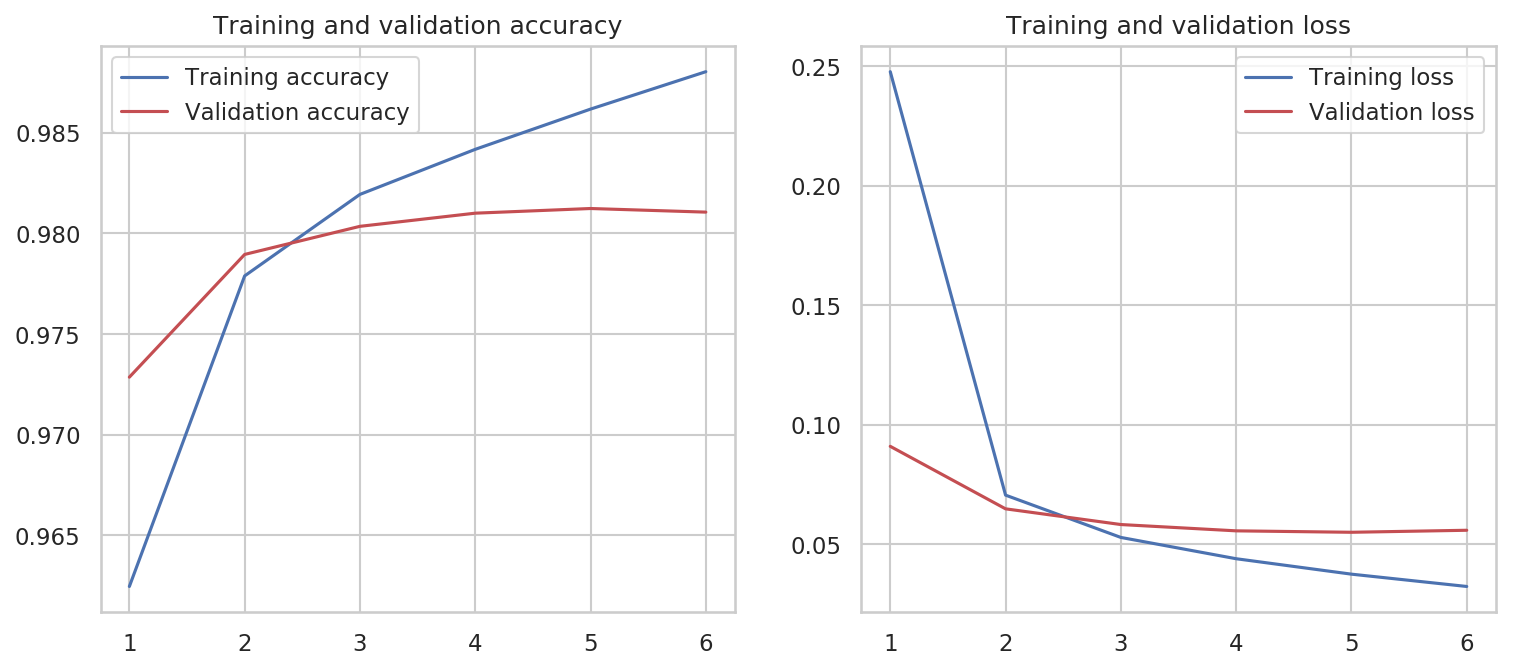

In [15]:
plotTrainingProcess(history)

In [16]:
X_test_split_tfidf = tfidfVec.transform(test["comment_text"])
Y_test_split = test[categories]
print('X_test_split_tfidf.shape: ', X_test_split_tfidf.shape)

X_test_split_tfidf.shape:  (16276, 54351)


In [18]:
testData = pd.read_csv("drive/My Drive/Colab Notebooks/cleaned_test_data.csv")
testLabel = pd.read_csv("drive/My Drive/Colab Notebooks/test_labels.csv")
testDataMerge = pd.merge(left=testData,right=testLabel, left_on='id', right_on='id')
testDataMerge[categories] = testDataMerge[categories]

# drop rows if any column contains -1
selectValidRow = testDataMerge[categories].eq(-1).all(axis=1)
kaggle_test = testDataMerge.mask(selectValidRow).dropna(axis=0)
kaggle_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,thank you for understanding i think very highl...,0.0,0.0,0.0,0.0,0.0,0.0
7,000247e83dcc1211,dear god this site is horrible,0.0,0.0,0.0,0.0,0.0,0.0
11,0002f87b16116a7f,somebody will invariably try to add religion r...,0.0,0.0,0.0,0.0,0.0,0.0
13,0003e1cccfd5a40a,it says it right there that it is a type the t...,0.0,0.0,0.0,0.0,0.0,0.0
14,00059ace3e3e9a53,before adding a new product to the list make s...,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_test_kaggle_tfidf = tfidfVec.transform(kaggle_test["comment_text"])
Y_test_kaggle = kaggle_test[categories]
print('X_test_kaggle_vec.shape: ', X_test_kaggle_tfidf.shape)

X_test_kaggle_vec.shape:  (63959, 54351)


In [0]:
prediction_test_split = model.predict(X_test_split_tfidf)
prediction_test_split = pd.DataFrame(data = prediction_test_split, columns = categories)
prediction_kaggle = model.predict(X_test_kaggle_tfidf)
prediction_kaggle = pd.DataFrame(data = prediction_kaggle, columns = categories)

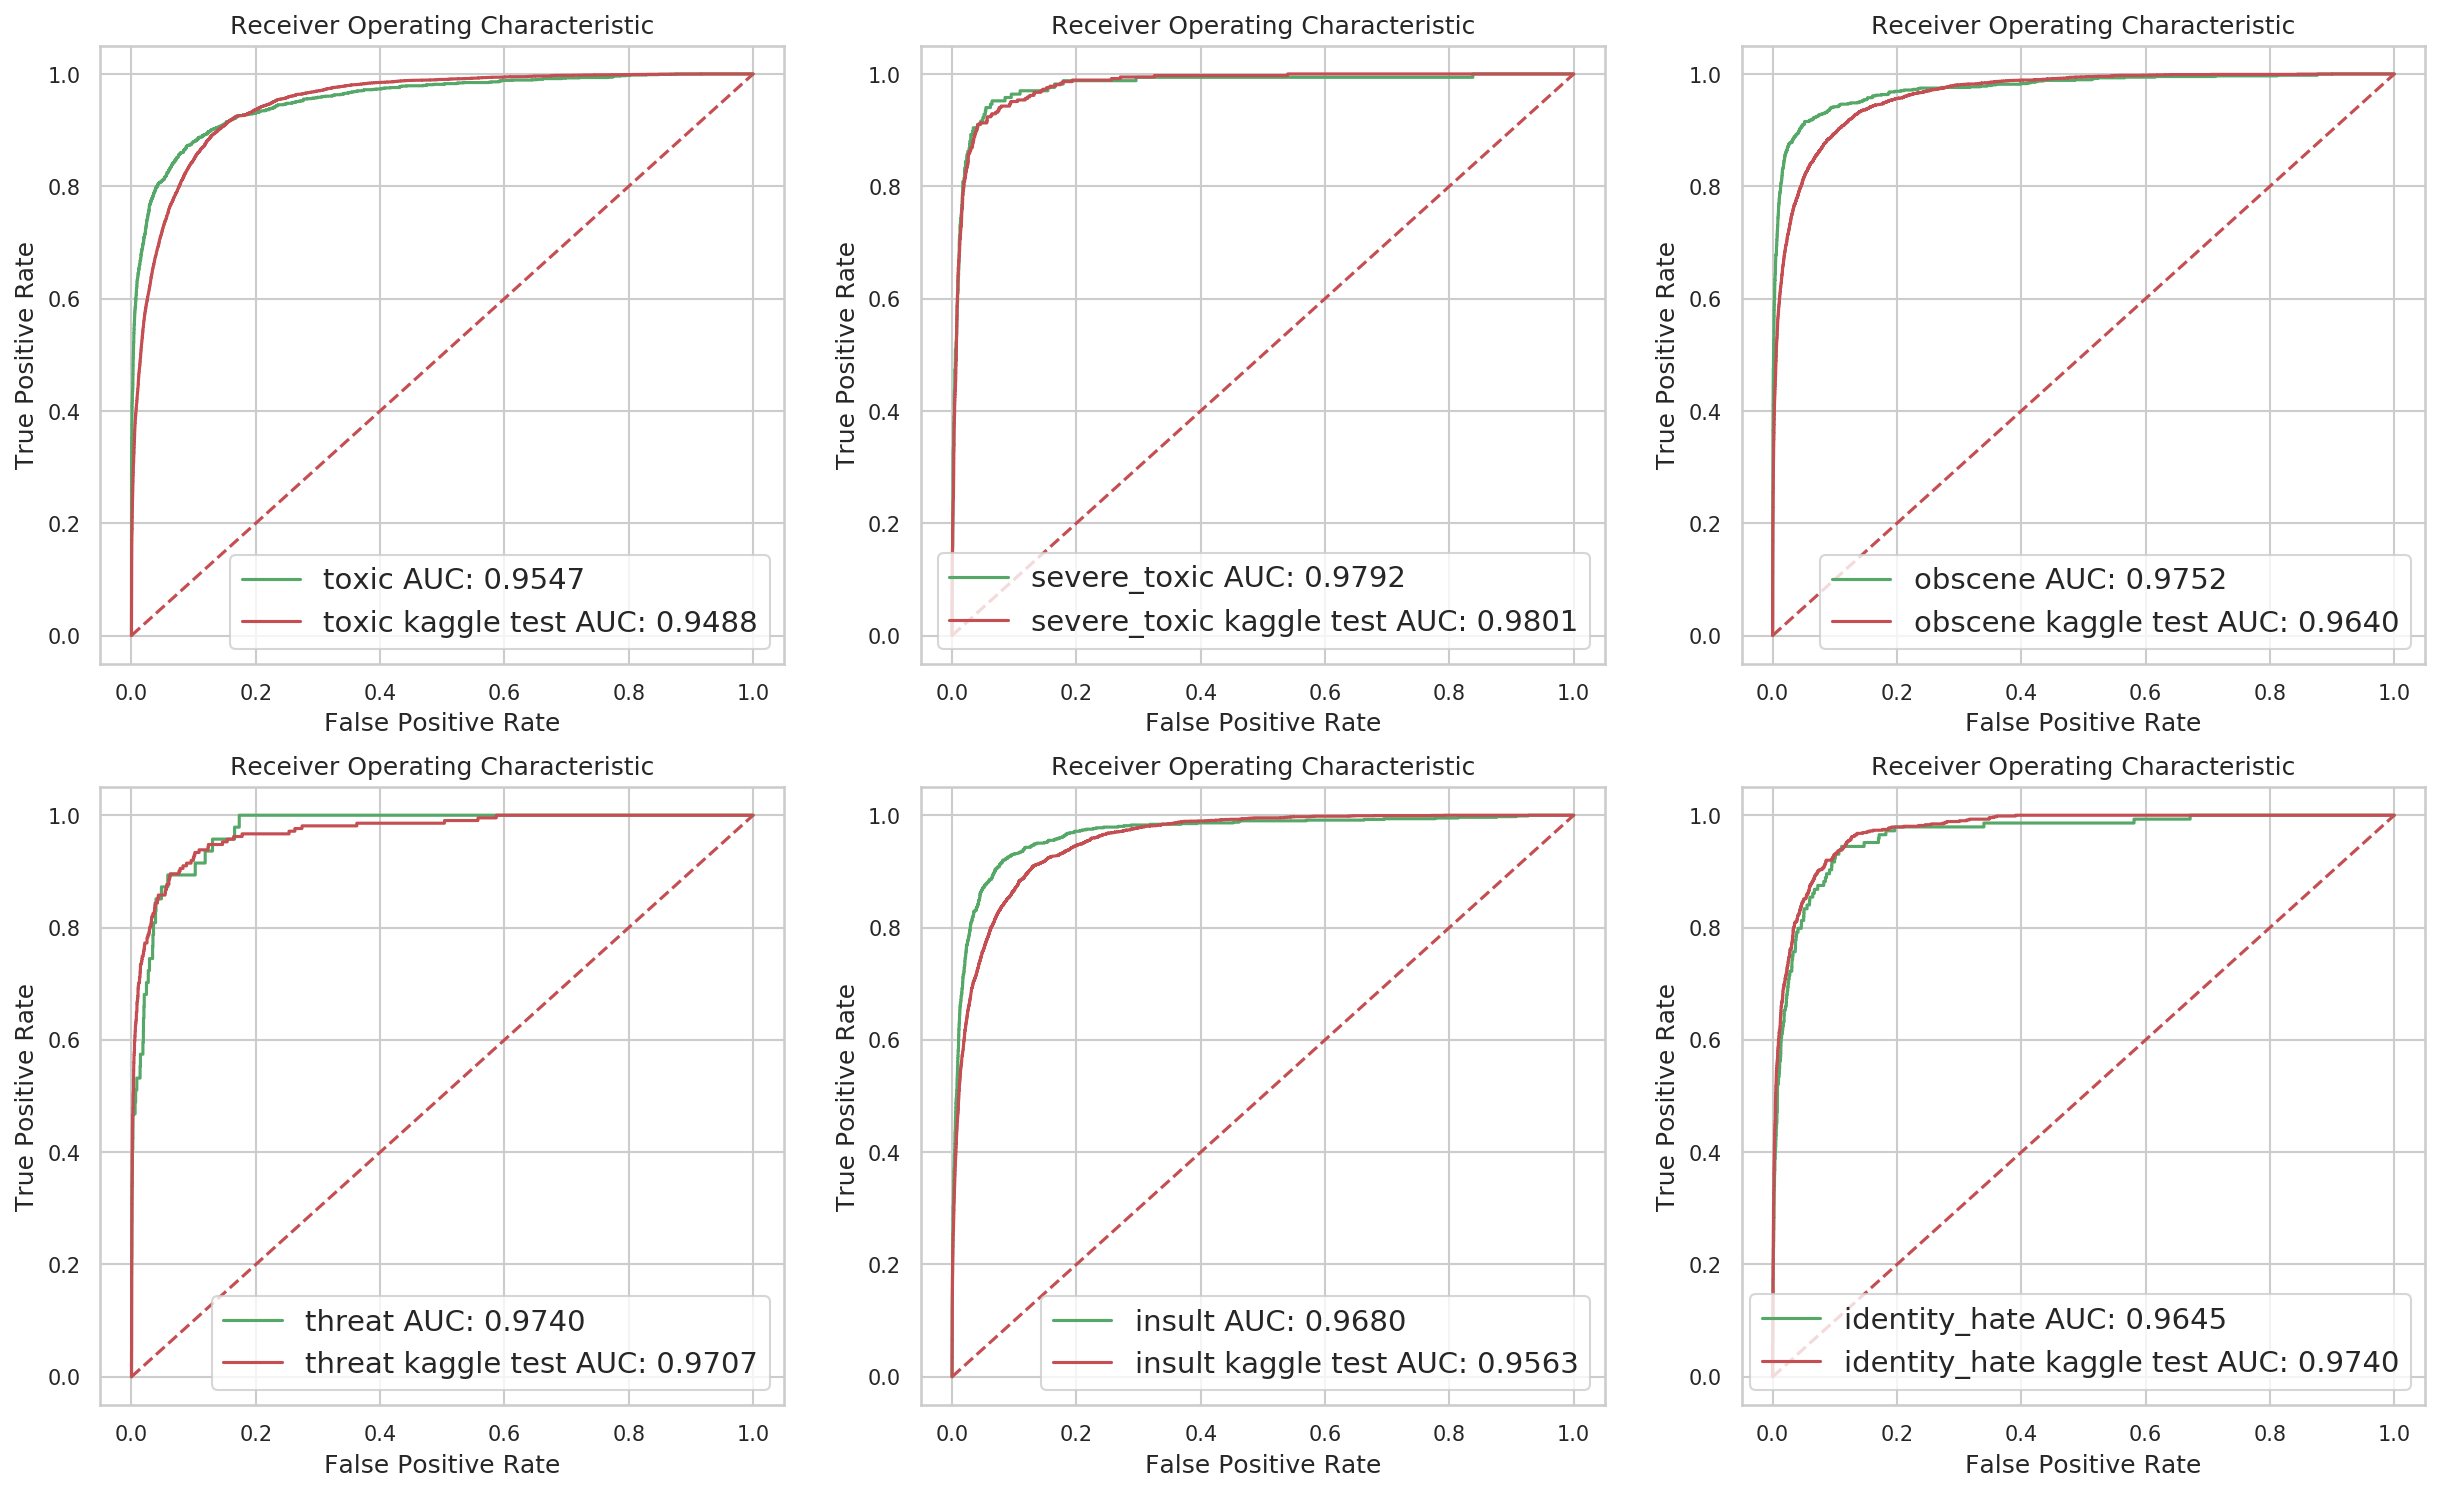

In [22]:
# plot roc curve for each category
fig2, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 12))
for i, ax in enumerate(axes.flatten()):
    # build each model for each category
    predictProbs = prediction_test_split[categories[i]]
    fpr, tpr, thresholds = roc_curve(test[categories[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    label = '{} AUC: {:.4f}'.format(categories[i], roc_auc)
    ax.plot([0,1], [0,1], 'r--')
    ax.plot(fpr, tpr, c = 'g', label = label)
    ax.set_title('Receiver Operating Characteristic', fontsize = 12)
    ax.set_xlabel('False Positive Rate', fontsize = 12)
    ax.set_ylabel('True Positive Rate', fontsize = 12)
    ax.legend(loc = 'lower right', fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    # fit all the training set
    predictProbs = prediction_kaggle[categories[i]]
    fpr, tpr, thresholds = roc_curve(kaggle_test[categories[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    label = '{} kaggle test AUC: {:.4f}'.format(categories[i], roc_auc)
    ax.plot(fpr, tpr, c = 'r', label = label)
    
    ax.legend(loc = 'lower right', fontsize = 14)

In [24]:
testData.head()

,id,comment_text
0,00001cee341fdb12,to bitch a rule is more successful then you al...
1,0000247867823ef7,from rec the title is fine as it is limo
2,00013b17ad220c46,sources awe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i don't anonymously edit articles at all


In [26]:
testData["comment_text"].isnull().sum()

44

In [0]:
testData["comment_text"].fillna("UNK", inplace=True)

In [0]:
X_test_kaggle_tfidf_submission = tfidfVec.transform(testData["comment_text"])

In [0]:
prediction_test_keggle_submission = model.predict(X_test_kaggle_tfidf_submission)

In [0]:
prediction_test_keggle_submission = pd.DataFrame(data = prediction_test_keggle_submission, columns = categories)

In [32]:
prediction_test_keggle_submission.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.999988,0.223640,0.999669,0.019224,0.989290,0.294230
1,0.001492,0.000383,0.001540,0.000585,0.001357,0.000666
2,0.014468,0.003269,0.004018,0.005206,0.005908,0.005229
3,0.000206,0.000063,0.000233,0.000085,0.000293,0.000068
4,0.002603,0.000765,0.001053,0.001439,0.001799,0.001122


In [0]:
submission = pd.concat([testData["id"], prediction_test_keggle_submission], axis=1)

In [0]:
submission.to_csv("drive/My Drive/Colab Notebooks/NN_submission.csv", index=False)